In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
restaurants = pd.read_csv(
    "https://raw.githubusercontent.com/xoyeon/mdrplib/master/public_instances/0o100t100s1p100/restaurants.txt",
    sep = '\t')
# restaurants.columns = ['restaurant', 'r_x', "r_y"]
restaurants

,restaurant,x,y
0,r1,8708,5633
1,r2,9103,6345
2,r3,8991,6342
3,r4,8542,5317
4,r5,7577,5076
...,...,...,...
111,r112,8884,7405
112,r113,796,6628
113,r114,7526,7726
114,r115,9843,9303


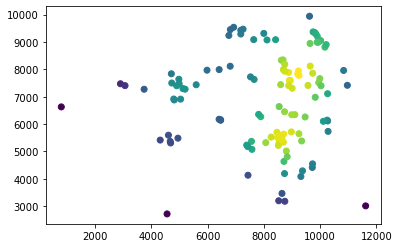

In [11]:
x = restaurants['x']
y = restaurants['y']

xy = np.vstack([x,y])

from scipy.stats import gaussian_kde
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()

ax.scatter(x, y, c=z)
plt.show()

In [3]:
orders = pd.read_csv(
    "https://raw.githubusercontent.com/xoyeon/mdrplib/master/public_instances/0o100t100s1p100/orders.txt",
    sep = '\t')
# orders.columns = ['order', 'o_x', 'o_y', 'placement_time', 'restaurant', 'ready_time']
orders

,order,x,y,placement_time,restaurant,ready_time
0,o1,9131,7497,743,r1,753
1,o2,9024,6677,541,r2,557
2,o3,5645,7048,626,r3,656
3,o4,6019,5613,566,r4,582
4,o5,7083,5106,574,r5,582
...,...,...,...,...,...,...
500,o501,6531,4914,497,r102,521
501,o502,3813,8200,289,r99,325
502,o503,3023,4692,576,r93,588
503,o504,9417,4103,623,r28,649


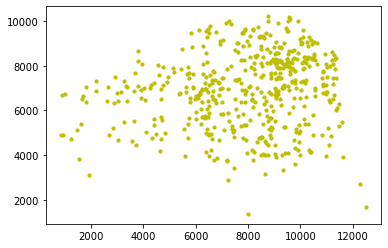

In [5]:
x = orders['x']
y = orders['y']

fig, ax = plt.subplots()

ax.scatter(x,y,10,'y')
plt.show()

In [4]:
couriers = pd.read_csv(
    "https://raw.githubusercontent.com/xoyeon/mdrplib/master/public_instances/0o100t100s1p100/couriers.txt",
    sep = '\t')
# couriers.columns = ['courier', 'c_x', 'c_y', 'on_time', 'off_time']
couriers

,courier,x,y,on_time,off_time
0,c1,11491,2806,0,90
1,c2,7950,223,0,90
2,c3,2818,10568,30,210
3,c4,12413,7222,90,270
4,c5,3572,3264,90,270
...,...,...,...,...,...
108,c109,10855,7784,690,810
109,c110,7038,5694,690,840
110,c111,5013,2778,690,810
111,c112,8236,1518,690,810


In [7]:
couriers.describe()

,x,y,on_time,off_time
count,113.000000,113.000000,113.000000,113.000000
mean,6836.000000,5111.106195,399.115044,560.000000
std,3586.962073,3268.916281,202.513481,195.440848
min,0.000000,0.000000,0.000000,90.000000
25%,3791.000000,2606.000000,270.000000,450.000000
50%,6471.000000,4827.000000,450.000000,630.000000
75%,9859.000000,7596.000000,510.000000,690.000000
max,12555.000000,11777.000000,690.000000,840.000000


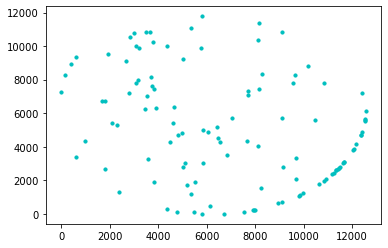

In [8]:
x = couriers['x']
y = couriers['y']

fig, ax = plt.subplots()

ax.scatter(x,y,10, 'c')
plt.show()

# 시간에 따른 변화 살펴보기
## x축 time, y축 order 수, courier 수/밀집도, courier x/y
## courier 간의 평균 거리 및 편차 / min-max

## x축 time, y축 order 수, courier 수/밀집도, courier x/y

<AxesSubplot:xlabel='placement_time', ylabel='count'>

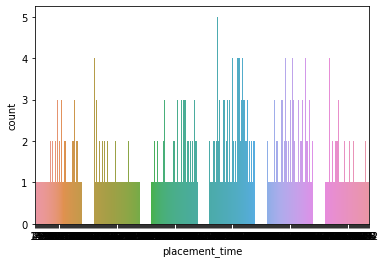

In [9]:
sns.countplot(x='placement_time', data = orders)

<AxesSubplot:xlabel='ready_time', ylabel='count'>

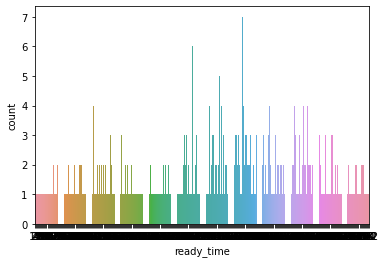

In [10]:
sns.countplot(x='ready_time', data = orders)

In [50]:
couriers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   courier   113 non-null    object
 1   x         113 non-null    int64 
 2   y         113 non-null    int64 
 3   on_time   113 non-null    int64 
 4   off_time  113 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.5+ KB


In [64]:
couriers['on_time'].unique()

array([  0,  30,  90, 210, 270, 390, 400, 450, 510, 630, 690], dtype=int64)

In [65]:
couriers['off_time'].unique()

array([ 90, 210, 270, 293, 330, 450, 510, 560, 630, 645, 690, 750, 702,
       810, 840], dtype=int64)

In [91]:
c_time = set([0,  30,  90, 210, 270, 390, 400, 450, 510, 630, 690,
          90, 210, 270, 293, 330, 450, 510, 560, 630, 645, 690, 750, 702, 810, 840])
time_list = list(c_time)
sorted(time_list)

[0,
 30,
 90,
 210,
 270,
 293,
 330,
 390,
 400,
 450,
 510,
 560,
 630,
 645,
 690,
 702,
 750,
 810,
 840]

In [ ]:
on_off = [0, 30, 90, 210, 270, 293, 330, 390, 400, 450,
          510, 560, 630, 645, 690, 702, 750, 810, 840]

<AxesSubplot:xlabel='on_time', ylabel='count'>

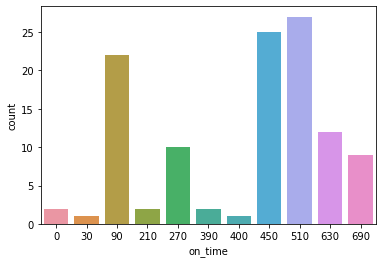

In [95]:
sns.countplot(x='on_time', data = couriers)

<AxesSubplot:xlabel='off_time', ylabel='count'>

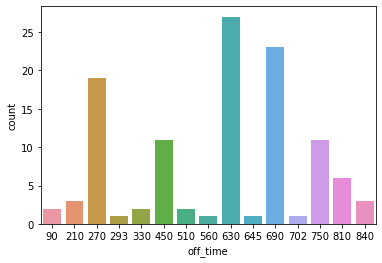

In [12]:
sns.countplot(x='off_time', data = couriers)

In [9]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10, 10

In [97]:
orders['ready_time'].describe()

count    505.000000
mean     493.283168
std      192.877647
min       11.000000
25%      325.000000
50%      558.000000
75%      636.000000
max      822.000000
Name: ready_time, dtype: float64

<AxesSubplot:xlabel='ready_time', ylabel='Density'>

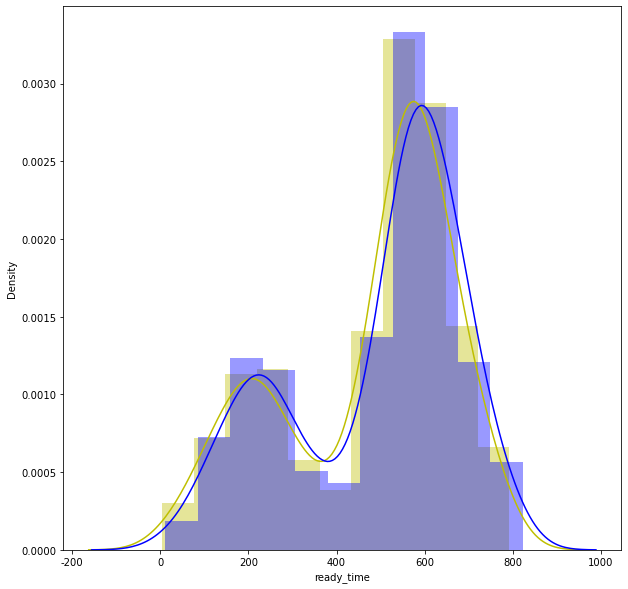

In [10]:
fig, ax = plt.subplots(ncols=1)
sns.distplot(orders['placement_time'], color = 'y')
sns.distplot(orders['ready_time'], color = 'b')

In [12]:
meal_ready = orders['ready_time'] - orders['placement_time']
pd.DataFrame(meal_ready)

,0
0,10
1,16
2,30
3,16
4,8
...,...
500,24
501,36
502,12
503,26


In [13]:
meal_ready.describe()

count    505.000000
mean      17.037624
std        8.940310
min        1.000000
25%       10.000000
50%       15.000000
75%       22.000000
max       55.000000
dtype: float64

<AxesSubplot:xlabel='off_time', ylabel='Density'>

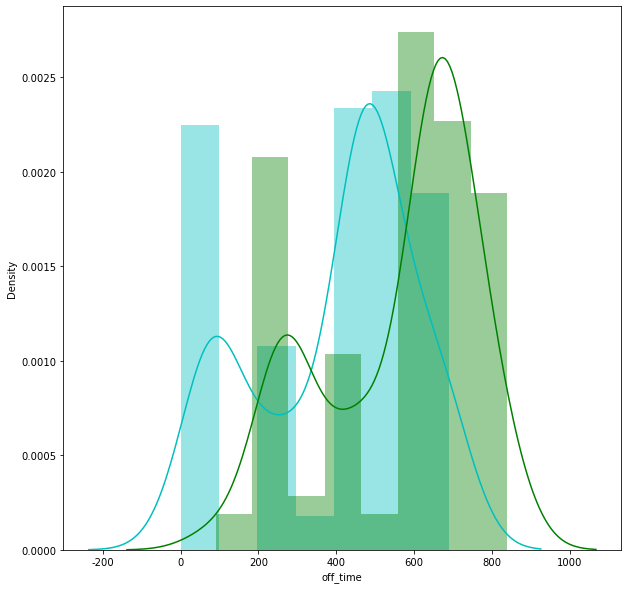

In [14]:
fig, ax = plt.subplots(ncols=1)
sns.distplot(couriers['on_time'], color = 'c')
sns.distplot(couriers['off_time'], color = 'g')

<AxesSubplot:xlabel='off_time', ylabel='Density'>

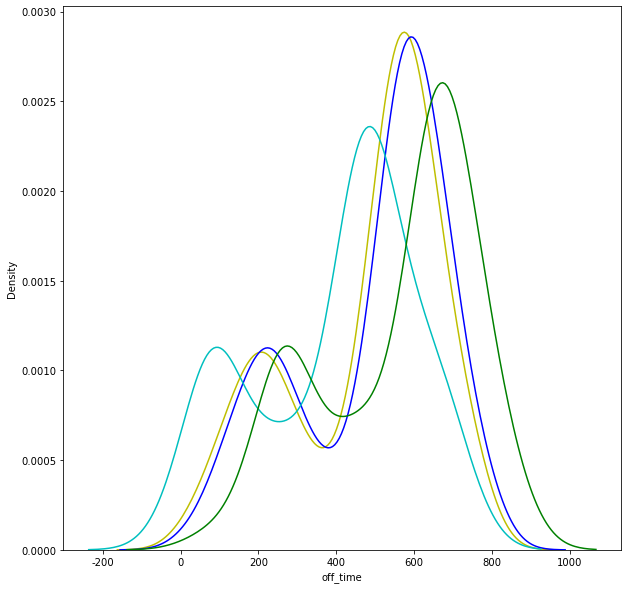

In [15]:
fig, ax = plt.subplots(ncols=1)
sns.distplot(orders['placement_time'], color = 'y', hist=False)
sns.distplot(orders['ready_time'], color = 'b', hist=False)

sns.distplot(couriers['on_time'], color = 'c', hist=False)
sns.distplot(couriers['off_time'], color = 'g', hist=False)

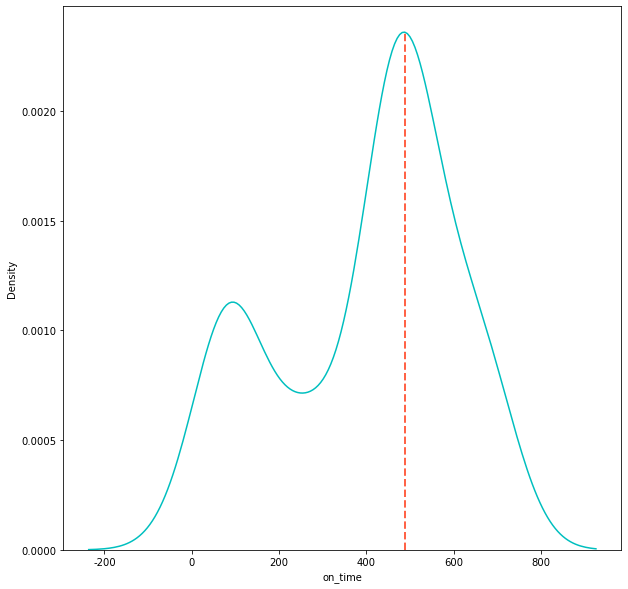

488.0666577280253 0.0023591830791363784


In [22]:
ax = sns.distplot(couriers['on_time'], color = 'c', hist=False)
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
mode_idx = np.argmax(ys)
ax.vlines(xs[mode_idx], 0, ys[mode_idx], color='tomato', ls='--', lw=2)
plt.show()
print(xs[mode_idx], ys[mode_idx])

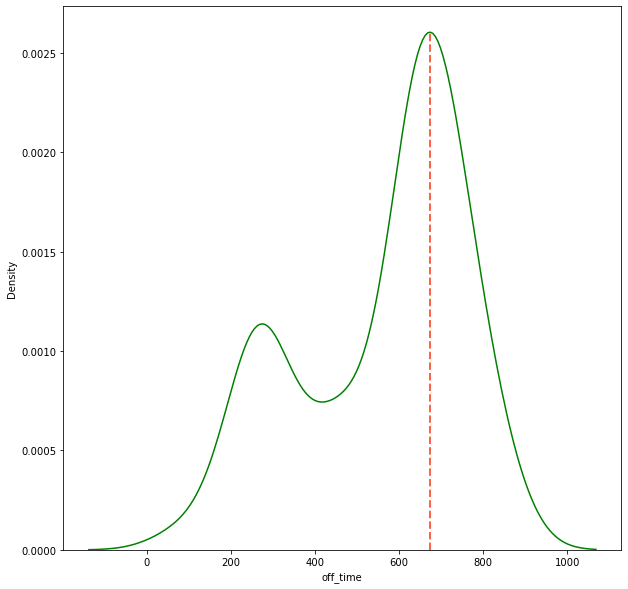

674.0050872384229 0.00260350344881205


In [23]:
ax = sns.distplot(couriers['off_time'], color = 'g', hist=False)
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
mode_idx = np.argmax(ys)
ax.vlines(xs[mode_idx], 0, ys[mode_idx], color='tomato', ls='--', lw=2)
plt.show()
print(xs[mode_idx], ys[mode_idx])

In [27]:
round(674.0050872384229 - 488.0666577280253)

186

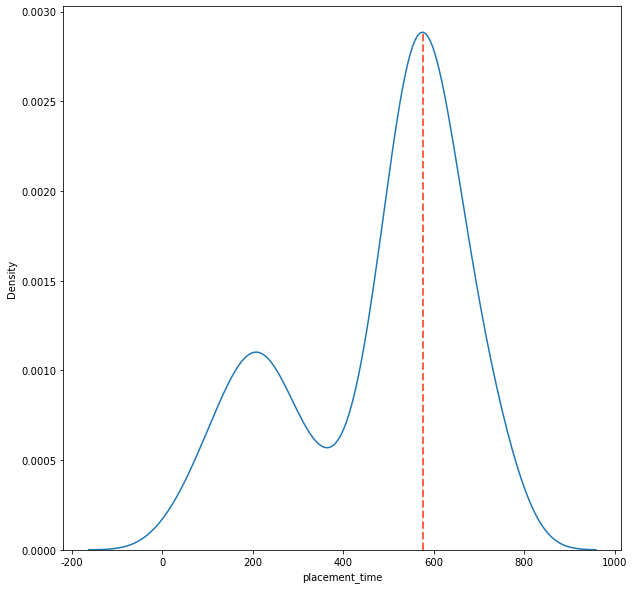

575.3882840913697 0.0028851730749016825


In [28]:
ax = sns.distplot(orders['placement_time'],  hist=False)
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
mode_idx = np.argmax(ys)
ax.vlines(xs[mode_idx], 0, ys[mode_idx], color='tomato', ls='--', lw=2)
plt.show()
print(xs[mode_idx], ys[mode_idx])

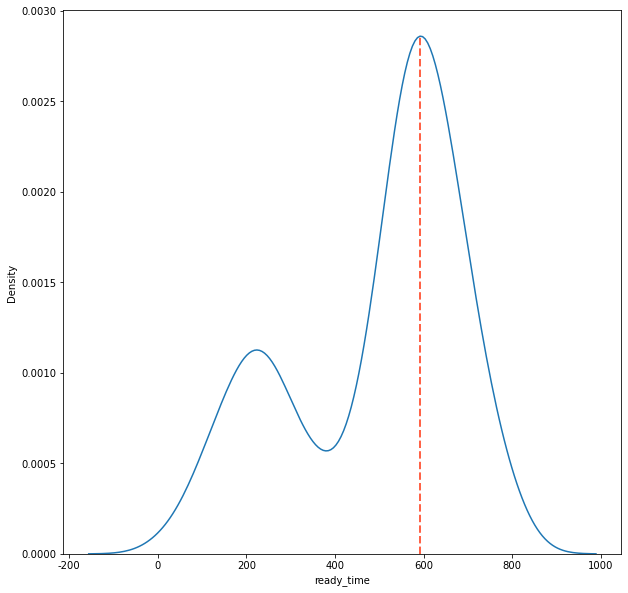

591.8755546334271 0.002858997293794792


In [29]:
ax = sns.distplot(orders['ready_time'],  hist=False)
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
mode_idx = np.argmax(ys)
ax.vlines(xs[mode_idx], 0, ys[mode_idx], color='tomato', ls='--', lw=2)
plt.show()
print(xs[mode_idx], ys[mode_idx])

In [30]:
round(591.8755546334271 - 575.3882840913697)

16

In [33]:
working_h = couriers['off_time'] - couriers['on_time']
pd.DataFrame(working_h)

,0
0,90
1,90
2,180
3,180
4,180
5,180
6,180
7,180
8,180
9,120


In [21]:
working_h.describe()

count    113.000000
mean     160.884956
std       31.200604
min       50.000000
25%      120.000000
50%      180.000000
75%      180.000000
max      203.000000
dtype: float64

In [31]:
from scipy.spatial.distance import cityblock

a = (couriers['x'],0)
b = (0,couriers['y'])

rider_dist = cityblock(a, b)

pd.set_option('display.max_rows', None)
pd.DataFrame(rider_dist)

,0
0,14297
1,8173
2,13386
3,19635
4,6836
5,19916
6,11930
7,6635
8,7262
9,12422


In [24]:
r_x = (restaurants['x'],0)
r_y = (0,restaurants['y'])

restaurant_dist = cityblock(r_x, r_y)
pd.DataFrame(restaurant_dist)

,0
0,14341
1,15448
2,15333
3,13859
4,12653
5,18388
6,16505
7,12619
8,16382
9,13949


In [51]:
print("배달원 : ", rider_dist.describe())
print("---------------")
print("음식점 : ", restaurant_dist.describe())

배달원 :  count      113.000000
mean     11947.106195
std       4000.860306
min       3639.000000
25%       8886.000000
50%      11737.000000
75%      14761.000000
max      19916.000000
dtype: float64
---------------
음식점 :  count      116.000000
mean     14881.086207
std       2698.137736
min       7274.000000
25%      12645.500000
50%      14906.500000
75%      16937.000000
max      19566.000000
dtype: float64


In [34]:
working_h.value_counts()

180    76
120    27
150     3
90      2
203     1
50      1
110     1
195     1
72      1
dtype: int64